In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load the dataset
data = pd.read_csv('./rainfall_in_india_1901-2015.csv')

# Display the first few rows of the dataframe
print(data.head())


                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [15]:
# Extract relevant columns for modeling
# Assuming you want to predict ANNUAL rainfall based on monthly data
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
X = data[features]  # Input features (monthly rainfall data)
y = data['ANNUAL']  # Target variable (annual rainfall)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with a strategy (e.g., mean)
y_imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the target variable (y)
y_imputed = y_imputer.fit_transform(data[['ANNUAL']])

# Extract features and target variable from the original data
X = data[features]               # Input features
y = pd.Series(y_imputed.flatten())  # Target variable (convert to Series)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the imputed training data
model.fit(X_train_imputed, y_train)


LinearRegression()

In [22]:
# Make predictions using the imputed test data
y_pred = model.predict(X_test_imputed)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2271.468032417406
R^2 Score: 0.9974041042982648


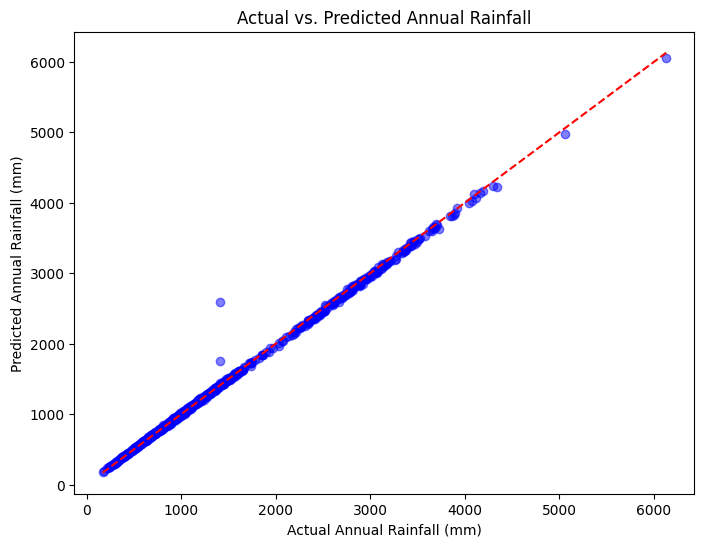

In [23]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot

# Adding labels and title
plt.xlabel('Actual Annual Rainfall (mm)')
plt.ylabel('Predicted Annual Rainfall (mm)')
plt.title('Actual vs. Predicted Annual Rainfall')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Display plot
plt.show()

In [25]:
print(y_pred)

[ 789.99747579 1542.78491424 1187.85394203 1598.4809675  2962.12711992
 2722.96908075 1078.04628815 1144.93149151 2857.6253042   813.68101473
  570.28349979  787.90955425 3304.21875621 1419.11080683  853.15717844
  668.244959    519.00718064  277.26783854 2579.70562269  789.4166422
  959.32596103 2916.65942679 1011.38322103  755.39668879 1016.30026963
 2893.43716436 1063.82359194 3198.73817536 1128.84445968 1379.25790826
  789.8817596  2570.286258    825.14879908  692.68673042  719.53032045
 1248.05685338 1501.82675964  773.44558829  644.2046591  1081.40652956
  479.01915631  931.76857911 2555.26752063  615.06864893 1065.14488449
  595.36695544 1012.93559564 1315.41951567 3109.91884905  359.65151203
 2213.3837122  1057.77042333 2319.50650102  936.56742926  798.07789294
  637.20521829 4979.30759738 2817.79455101  987.03391088  914.46689979
 1875.43904422 2404.29220449  393.24256832  570.78946076  803.47425617
 3489.64818046 1507.44108175 1943.0949281  1376.38511988  762.43775913
  882.1

In [26]:
# Convert y_pred to a pandas DataFrame
y_pred_df = pd.DataFrame({'Predicted_Annual_Rainfall': y_pred})

# Specify the file path to save the predicted values
output_file_path = 'rainfall_in_india_1901_2015.csv'

# Save the predicted values to a CSV file
y_pred_df.to_csv(output_file_path, index=False)